# NBA Assists Project

In [1]:
# NBA API Documentation
# https://github.com/swar/nba_api

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


import nba_api as nba
from nba_api.stats.endpoints import playercareerstats

In [3]:
from nba_api.stats.static import players

In [4]:
nba_players = players.get_players()
nba_players[:5]

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False}]

In [5]:
nba_players = pd.DataFrame(nba_players)
nba_players

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False
...,...,...,...,...,...
4895,1627790,Ante Zizic,Ante,Zizic,False
4896,78647,Jim Zoet,Jim,Zoet,False
4897,78648,Bill Zopf,Bill,Zopf,False
4898,1627826,Ivica Zubac,Ivica,Zubac,True


In [6]:
nba_players.query('first_name == "Nikola"')

,id,full_name,first_name,last_name,is_active
2226,203999,Nikola Jokic,Nikola,Jokic,True
2303,1631107,Nikola Jovic,Nikola,Jovic,True
2991,202703,Nikola Mirotic,Nikola,Mirotic,False
3398,201593,Nikola Pekovic,Nikola,Pekovic,False
4476,202696,Nikola Vucevic,Nikola,Vucevic,True


In [7]:
jokic = playercareerstats.PlayerCareerStats(player_id='203999')
jokic = jokic.get_data_frames()


In [8]:
jokicstats = pd.concat(jokic, axis=1)

In [9]:
jokicast = jokicstats['AST'].iloc[:, 0]
jokicage = jokicstats['PLAYER_AGE'].iloc[:, 0]
jokic = pd.DataFrame({'age': jokicage, 'Nikola Jokic AST': jokicast})
jokic = jokic.set_index('age')
jokic

,Nikola Jokic AST
age,
21.0,189
22.0,359
23.0,458
24.0,580
25.0,512
26.0,599
27.0,584
28.0,678
29.0,580


<Axes: xlabel='age'>

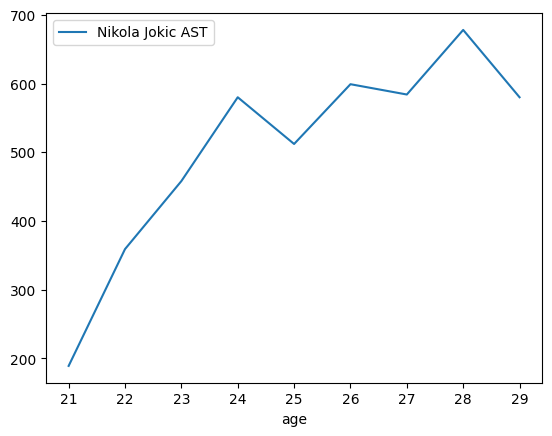

In [10]:
jokic.plot()

In [11]:
nba_players.query('first_name == "LeBron"')

,id,full_name,first_name,last_name,is_active
2111,2544,LeBron James,LeBron,James,True


In [12]:
lebron = playercareerstats.PlayerCareerStats(player_id='2544')
lebron = lebron.get_data_frames()

In [13]:
lebronstats = pd.concat(lebron, axis=1)

In [14]:
lebronast = lebronstats['AST'].iloc[:, 0]
lebronage = lebronstats['PLAYER_AGE'].iloc[:, 0]
lebron = pd.DataFrame({'age': lebronage, 'Lebron James AST': lebronast})
lebron = lebron.set_index('age')
lebron

,Lebron James AST
age,
19.0,465
20.0,577
21.0,521
22.0,470
23.0,539
24.0,587
25.0,651
26.0,554
27.0,387


<Axes: xlabel='age'>

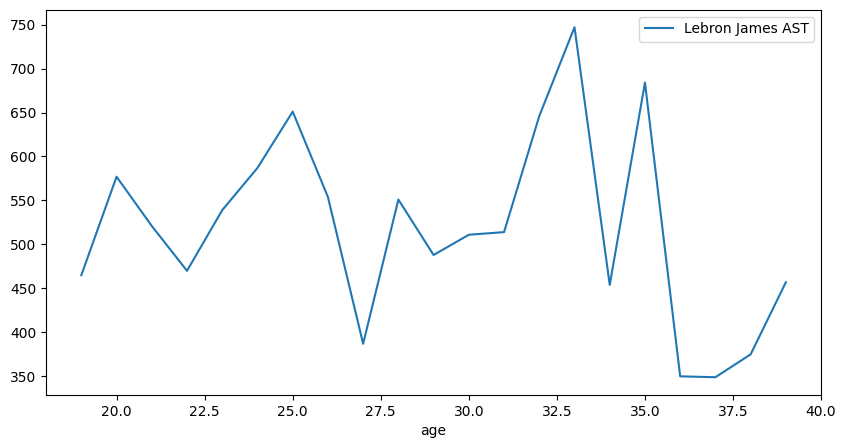

In [15]:
lebron.plot(figsize=(10,5))

In [16]:
combinedstats = pd.concat([lebron, jokic])
combinedstats

,Lebron James AST,Nikola Jokic AST
age,,
19.0,465.0,NaN
20.0,577.0,NaN
21.0,521.0,NaN
22.0,470.0,NaN
23.0,539.0,NaN
24.0,587.0,NaN
25.0,651.0,NaN
26.0,554.0,NaN
27.0,387.0,NaN


<Axes: title={'center': 'Assists by Age of Player'}, xlabel='age'>

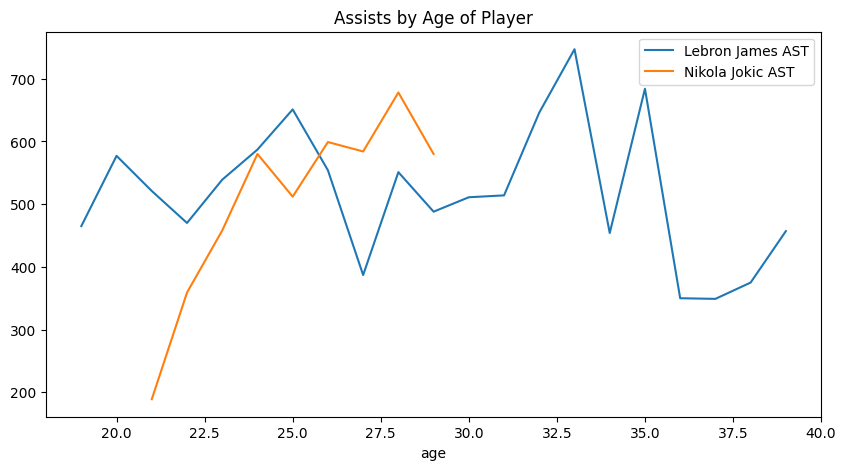

In [17]:
combinedstats.plot(figsize=(10,5), title='Assists by Age of Player')

In [18]:
nba_players.query('last_name == "Stockton"')

,id,full_name,first_name,last_name,is_active
4157,204065,David Stockton,David,Stockton,False
4158,304,John Stockton,John,Stockton,False


In [19]:
stockton = playercareerstats.PlayerCareerStats(player_id='304')
stockton = stockton.get_data_frames()

In [20]:
stocktonstats = pd.concat(stockton, axis=1)

In [21]:
stocktonast = stocktonstats['AST'].iloc[:, 0]
stocktonage = stocktonstats['PLAYER_AGE'].iloc[:, 0]
stockton = pd.DataFrame({'age': stocktonage, 'John Stockton AST': stocktonast})
stockton = stockton.set_index('age')
stockton

,John Stockton AST
age,
23.0,415
24.0,610
25.0,670
26.0,1128
27.0,1118
28.0,1134
29.0,1164
30.0,1126
31.0,987


In [22]:
combinedstats = pd.concat([combinedstats, stockton])
combinedstats

,Lebron James AST,Nikola Jokic AST,John Stockton AST
age,,,
19.0,465.0,NaN,NaN
20.0,577.0,NaN,NaN
21.0,521.0,NaN,NaN
22.0,470.0,NaN,NaN
23.0,539.0,NaN,NaN
24.0,587.0,NaN,NaN
25.0,651.0,NaN,NaN
26.0,554.0,NaN,NaN
27.0,387.0,NaN,NaN


<Axes: title={'center': 'Assists by Age of Player'}, xlabel='age'>

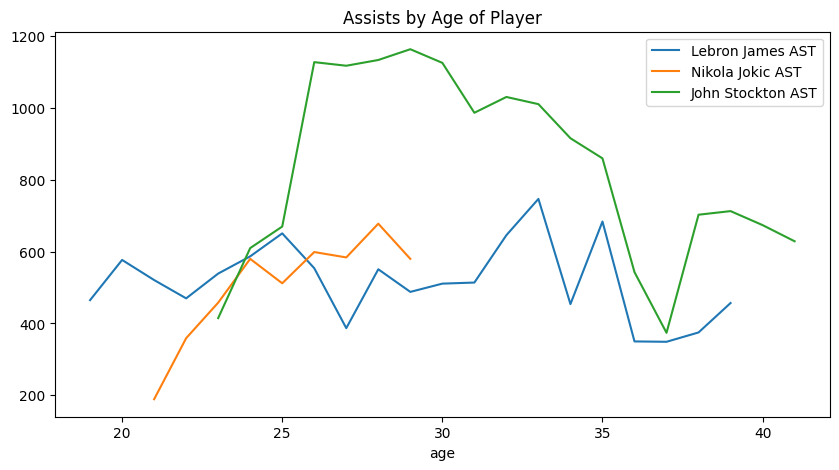

In [23]:
combinedstats.plot(figsize=(10,5), title='Assists by Age of Player')